Añadimos Librerias necesarias


In [2]:
import cv2 #para imágenes, Open CV (Computer Vision)
import numpy as np 
import matplotlib.pyplot as plt
import os #para poder acceder a funciones del sis


Clase 02images

In [42]:
class o2images:
    def __init__(self,img): #metodo de inicializacion
        self.img = img #volvemos atributo propio del objeto la misma imagen
        self.TamañoImagen = img.shape  # atributo de tamaño de la imagen
        self.tipodedatos = img.dtype  # tipo de datos de la imagen
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #cambiamos el formato de la imagen de BGR a RGB para poder graficar bien
        plt.imshow(img_rgb) #Mostramos imagen en pantalla
        plt.axis('off')  # Oculta los ejes en el gráfico
        plt.show() #muestra en si la figura con todos los ajustes realizados 

    def filtrado(self):
        hsv = cv2.cvtColor(self.img, cv2.COLOR_RGB2HSV) #pasamos de formato RGB a HSV para iniciar filtrtado

# definimos el rango de colores verdes en HSV
        verde_bajo = np.array([36, 25, 25]) 
        verde_alto = np.array([80, 255, 255])

# Crear una máscara para los píxeles verdes
        self.mascara = cv2.inRange(hsv, verde_bajo, verde_alto) #creamos la mascra la cual utilizaremos para filtrar la imagen,(hsv img de entrada y luego establecemos los limites, si se encuntra dentro del rango deseado, ese pixel valdra 1, en lo contrario valdara 0)
        ImagenFiltrada = cv2.bitwise_and(self.img,self.img, mask=  self.mascara) #multiplica pixel por pixel mi imagen (en los tres canales) de entrada con la amscaara creada anteriormente (no se por que hay que poner dos veces la misma entrada en la funcion)
        plt.imshow(ImagenFiltrada) #muestro imagen filtrada con zonas verdes
        plt.axis('off')  # Oculta los ejes en el gráfico
        plt.show()
        return(ImagenFiltrada) #devuelvo esa imagen filtrada para futuro uso
    def oxygenProduc(self):
        o2 = np.sum( self.mascara != 0) #cantidad de todos los píxeles blancos en la mascara
        co2 = np.sum( self.mascara == 0) #cantidad de todos los pixeles negros de la mascara
        Pverde=round((o2/(co2+o2))*100,3) #calculo porcentaje de blancos (que representaria a los verdes dentro de la imagen)
        return(Pverde) #devuevlo el valor de verdes


Filtrado en si

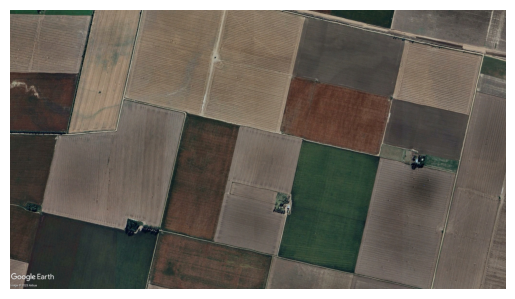

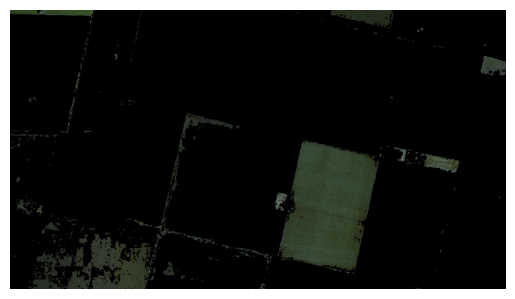

El porcentaje de sembrado de esta imagen es de 11.72%
Imagen filtrada 1 guardada en 'D:\facultad\Fundacion\Zona filtrada'


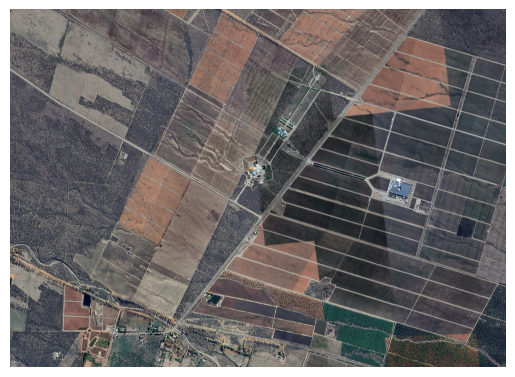

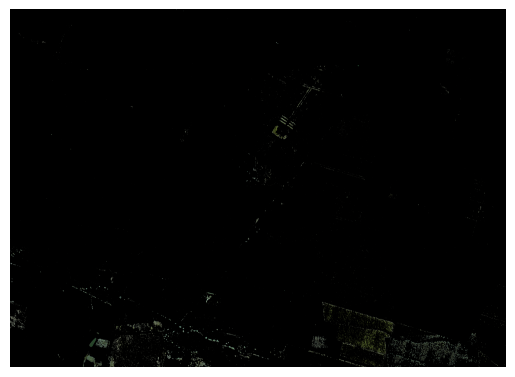

El porcentaje de sembrado de esta imagen es de 1.223%
Imagen filtrada 2 guardada en 'D:\facultad\Fundacion\Zona filtrada'


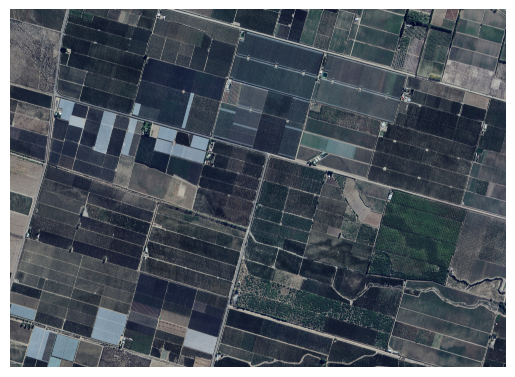

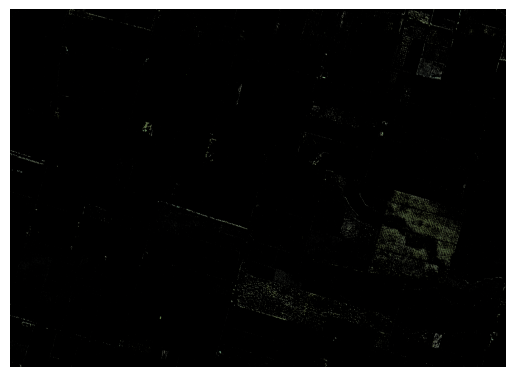

El porcentaje de sembrado de esta imagen es de 1.511%
Imagen filtrada 3 guardada en 'D:\facultad\Fundacion\Zona filtrada'


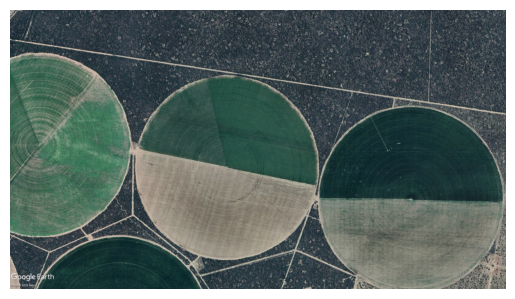

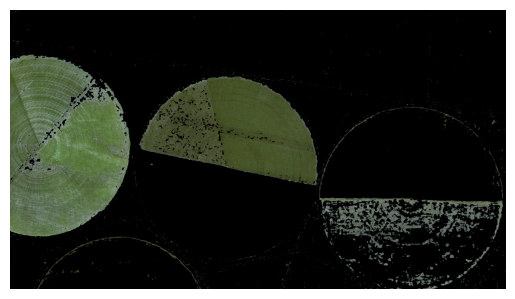

El porcentaje de sembrado de esta imagen es de 24.607%
Imagen filtrada 4 guardada en 'D:\facultad\Fundacion\Zona filtrada'


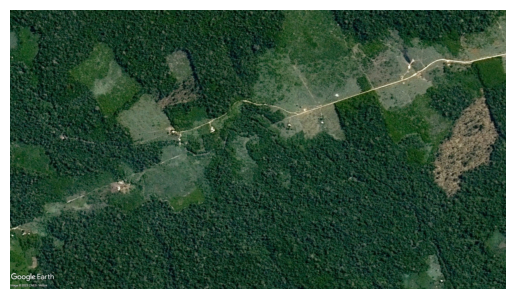

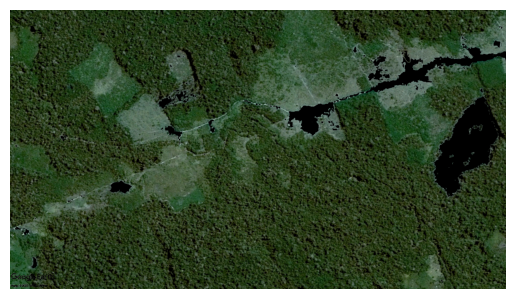

El porcentaje de sembrado de esta imagen es de 91.612%
Imagen filtrada 5 guardada en 'D:\facultad\Fundacion\Zona filtrada'


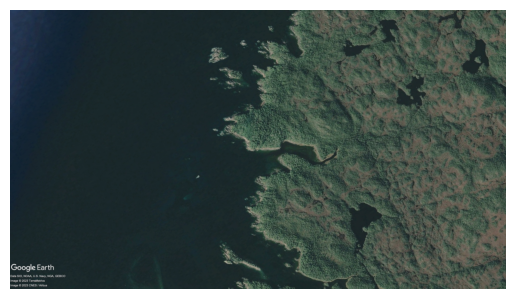

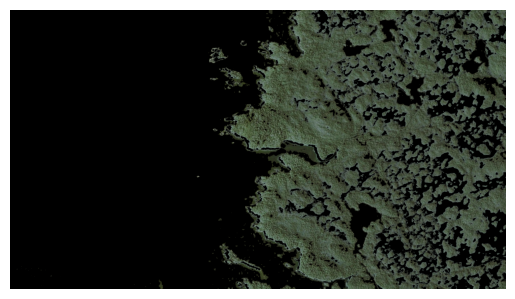

El porcentaje de sembrado de esta imagen es de 37.24%
Imagen filtrada 6 guardada en 'D:\facultad\Fundacion\Zona filtrada'


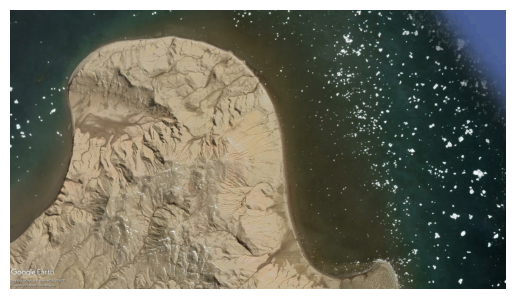

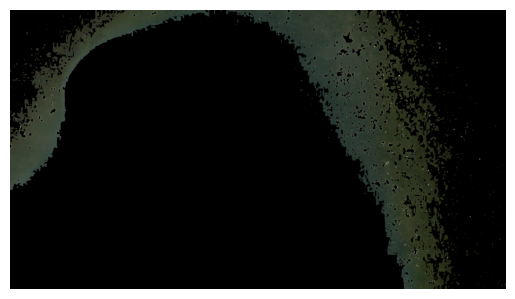

El porcentaje de sembrado de esta imagen es de 20.101%
Imagen filtrada 7 guardada en 'D:\facultad\Fundacion\Zona filtrada'


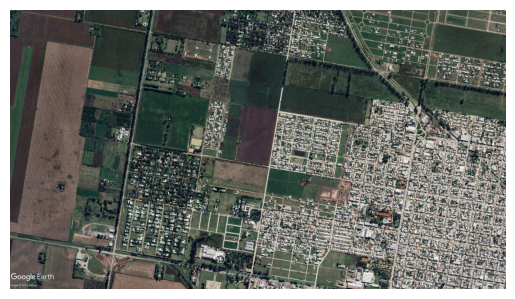

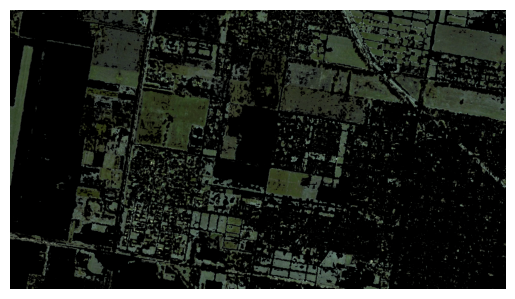

El porcentaje de sembrado de esta imagen es de 31.876%
Imagen filtrada 8 guardada en 'D:\facultad\Fundacion\Zona filtrada'


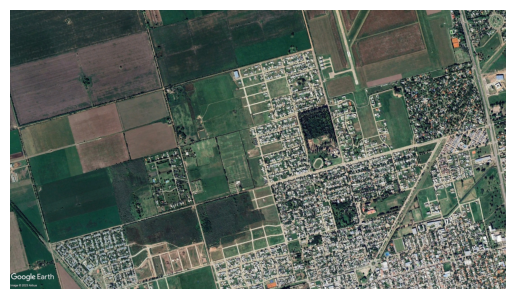

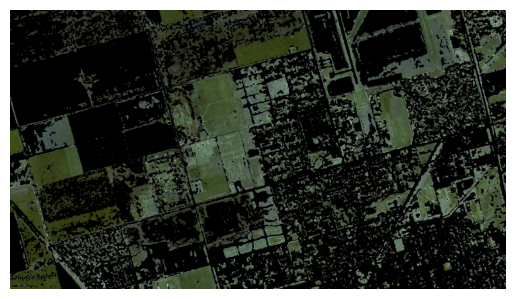

El porcentaje de sembrado de esta imagen es de 40.208%
Imagen filtrada 9 guardada en 'D:\facultad\Fundacion\Zona filtrada'


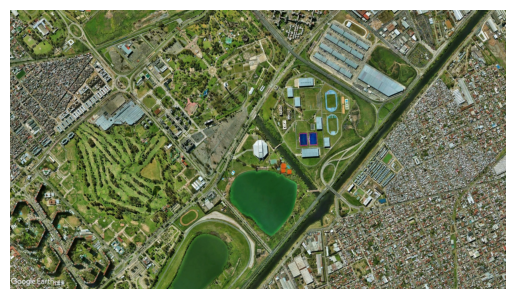

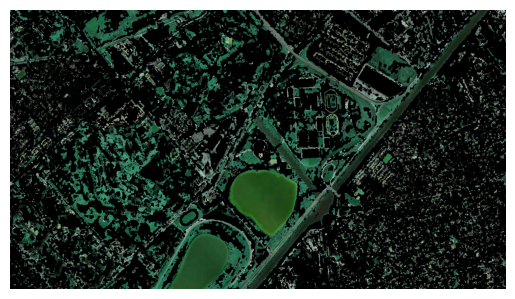

El porcentaje de sembrado de esta imagen es de 35.628%
Imagen filtrada 10 guardada en 'D:\facultad\Fundacion\Zona filtrada'
Proceso completado.


In [43]:
# Ruta base sonde se encuentran las imágenes originales
ruta_base_original = r"D:\facultad\Fundacion\zona1"  # Reemplaza con la ruta deseada

# Ruta base donde se creará la carpeta para las imágenes filtradas
ruta_base_filtrada = r"D:\facultad\Fundacion\Zona filtrada"  # Reemplaza con la ruta deseada

# Comprueba si la carpeta para las imágenes filtradas existe, si no, la crea
if not os.path.exists(ruta_base_filtrada):
    os.makedirs(ruta_base_filtrada)

# Iterar para leer y guardar imágenes filtradas
for num in range(1, 11):
    imgnum = "\Img" + str(num) + ".jpg"  # Genera el nombre del archivo a leer
    ruta_imagen_original =ruta_base_original+imgnum   # Ruta completa de la imagen original CONCATENO
    # Verifica si la imagen original existe
    if os.path.exists(ruta_imagen_original):
        img = cv2.imread(ruta_imagen_original)  # Lee la imagen desde la carpeta
        imgobj=o2images(img) #creamos el objeto
        imgf=imgobj.filtrado() #metodo de filtrado
        i=imgobj.oxygenProduc() #metodo de calculo de porcentaje de verdes
        print(f"El porcentaje de sembrado de esta imagen es de {i}%")
        # Guarda la imagen filtrada en la carpeta de imágenes filtradas
        ruta_imagen_filtrada = os.path.join(ruta_base_filtrada, f'filtimg{num}.jpg') #(ruta donde guardo el archivo, nombre del archivo)
        cv2.imwrite(ruta_imagen_filtrada, imgf) #guardo imagen
        print(f"Imagen filtrada {num} guardada en '{ruta_base_filtrada}'")
    else:
        print(f"No se encontró la imagen {num} en '{ruta_base_original}'") #en caso de que lka imagen que quiera guarradr por alguna razon no exista

print("Proceso completado.")

Mejorar iliuminacion con CLAHE


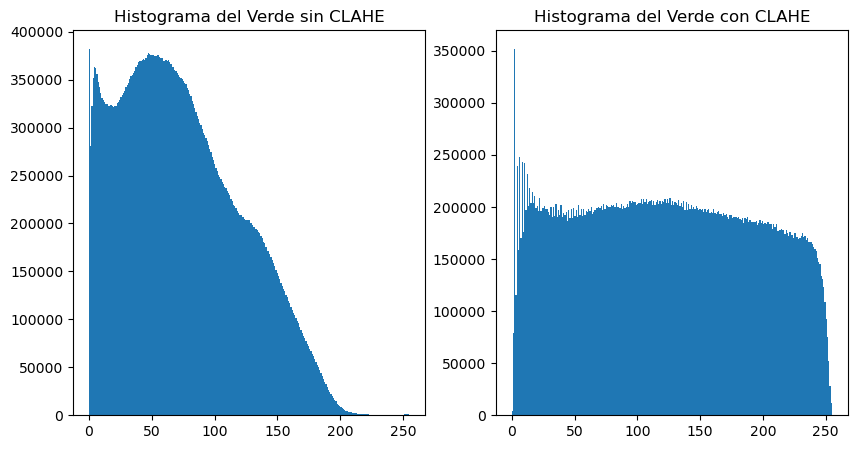

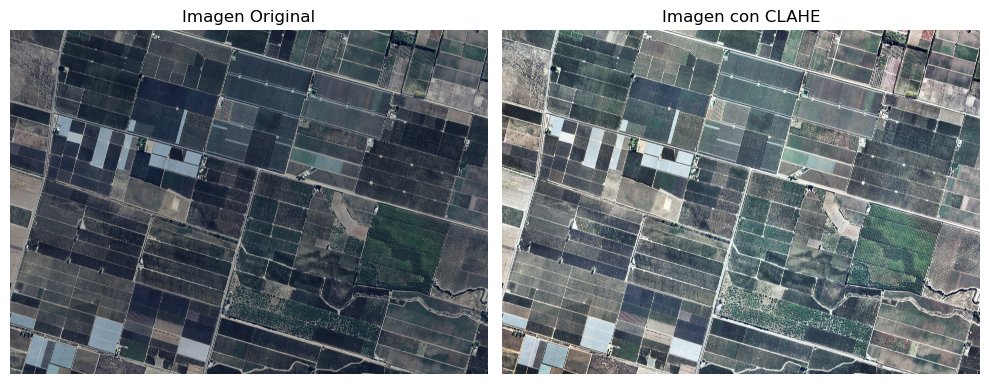

In [48]:
imagen = cv2.imread(r"D:\facultad\Fundacion\zona1\Img3.jpg")  # Lee la imagen
imagen=cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
imagen_clahe=np.copy(imagen)#compaimos la imagen para poder diferenciarlas y ademas que amabs iamgenes tengagn los mismos tamañaos

# Inicializar el objeto CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))  # Ajustes de parametros(umbral y tamaño de mascara) de formar estandar (sacados de internet) 
# Aplicar CLAHE a la imagen canal por canal, de esta manera ecualizamos todos los histogramas de todos los colores
imagen_clahe[:,:,0] = clahe.apply(imagen[:,:,0]) 
imagen_clahe[:,:,1] = clahe.apply(imagen[:,:,1])
imagen_clahe[:,:,2] = clahe.apply(imagen[:,:,2])
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(np.ravel(imagen[:,:,1]),bins=256), plt.title('Histograma del Verde sin CLAHE')#ravel=>imagen,bins=> cantidad de segmentos entre el rango dinamico
plt.subplot(1, 2, 2)
plt.hist(np.ravel(imagen_clahe[:,:,1]),bins=256), plt.title('Histograma del Verde con CLAHE') 
plt.show()

# Mostrar la imagen original y la imagen con CLAHE
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(imagen)
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imagen_clahe)
plt.title('Imagen con CLAHE')
plt.axis('off')
plt.tight_layout()
plt.show()
imagen=cv2.cvtColor(imagen, cv2.COLOR_RGB2BGR)
imagen_clahe=cv2.cvtColor(imagen_clahe, cv2.COLOR_RGB2BGR)

Corroboramos resultados en el histograma del verde, aparecen pixeles con valores de verdes mas potentes afectando en si la intensidad de este color dentro de la imagen

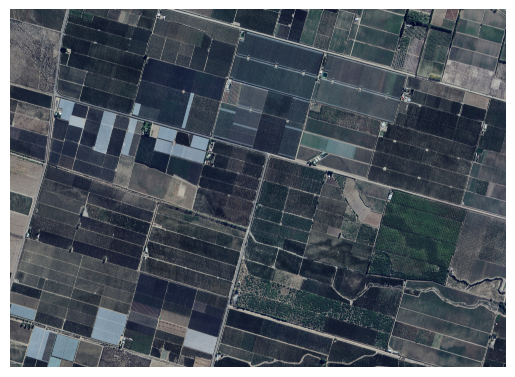

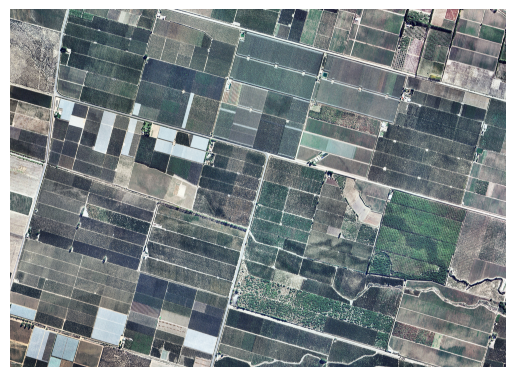

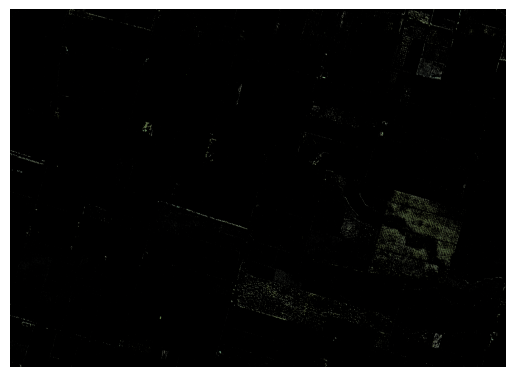

Porcentaje de verde sin CLAHE 1.511%


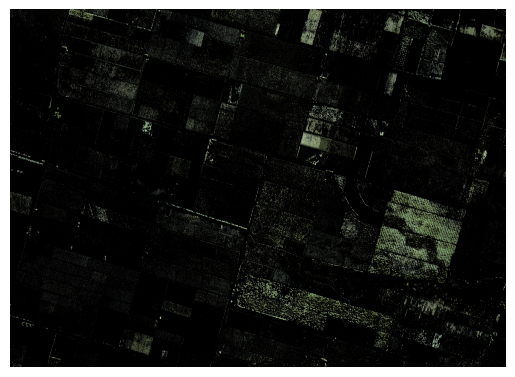

Porcentaje de verde con CLAHE 9.496%


In [17]:
imgobj1=o2images(imagen)
imgobj2=o2images(imagen_clahe)
filt1=imgobj1.filtrado()
print(f"Porcentaje de verde sin CLAHE {imgobj1.oxygenProduc()}%")
filt2=imgobj2.filtrado()
print(f"Porcentaje de verde con CLAHE {imgobj2.oxygenProduc()}%")

Se corroboran resultados donde si ecualizamos los histogramas de los distintos canales (mejora de iluminacion de la imagen), logramos captar mayor cantidad de verdes